In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data= pd.read_csv("advertising (1).csv")

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [58]:
x=data.drop(columns=["Sales"])
y=data[["Sales"]]

In [59]:
print(f"features shape : {x.shape}")
print(f"target shape  : {y.shape}")

features shape : (200, 3)
target shape  : (200, 1)


In [43]:
#the first step is to split the data in three parts :
#train set 
#test set 
#cross validation set

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.4,random_state=47)
x_test,x_cv,y_test,y_cv=train_test_split(x_,y_,test_size=0.5,random_state=47)
del x_,y_

In [62]:
print(f" the shape of the training set input {x_train.shape}")
print(f" the shape of the training set target {x_train.shape}")

print(f" the shape of the test set input {x_test.shape}")
print(f" the shape of the test set target {x_test.shape}")

print(f" the shape of the cross_validation set input {x_cv.shape}")
print(f" the shape of the cross_validation set shape target {y_cv.shape}")

 the shape of the training set input (120, 3)
 the shape of the training set target (120, 3)
 the shape of the test set input (40, 3)
 the shape of the test set target (40, 3)
 the shape of the cross_validation set input (40, 3)
 the shape of the cross_validation set shape target (40, 1)


In [63]:
# the second steps is the features scaling :
# we will use the  standarisation to help our model converge faster 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
standard_scaler=StandardScaler()
x_train_scaler=standard_scaler.fit_transform(x_train)

In [64]:
x_train_scaler

array([[-1.77693894,  0.90152522,  0.62091297],
       [-1.60729791,  1.04293213, -0.94766328],
       [-0.21965869, -0.60681524, -0.90833964],
       [ 1.49993996, -0.9030964 , -0.41897881],
       [ 1.28636312,  0.35609853, -0.65928993],
       [-1.61340011,  0.14735499,  0.5378964 ],
       [ 0.70055237,  0.03288272, -1.17923582],
       [ 0.37957689, -0.36440338, -0.23546849],
       [-0.98731487, -1.52932704, -0.70735216],
       [ 1.32175585, -0.23646379, -1.34089967],
       [ 0.8140532 , -1.42158844, -0.67239781],
       [-0.64315105, -1.19937756,  0.14902931],
       [-1.37419405,  0.15408865, -0.45393315],
       [ 0.22458113, -0.54621228, -1.24914451],
       [-0.8164534 , -1.56299535, -0.34033153],
       [ 0.91290876, -1.00410134, -0.97387904],
       [-0.94093818, -1.58319634, -0.95203257],
       [-0.2574923 , -0.29033309, -0.62870488],
       [-1.05810033, -0.5058103 ,  0.42866407],
       [-0.12202357,  0.02614906, -0.51947255],
       [ 0.77133783,  0.65237969,  0.301

### Plot the data before standardization

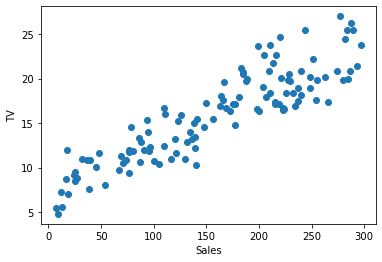

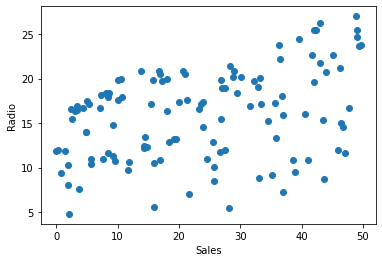

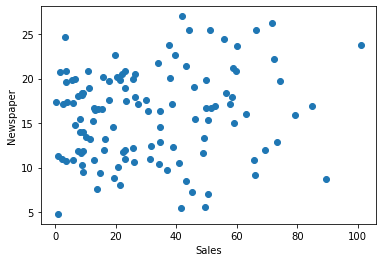

In [65]:
name_columns=x_train.columns
for column in name_columns:
    plt.figure()
    plt.scatter(x_train[column],y_train.values)
    plt.ylabel(column)
    plt.xlabel("Sales")
    plt.show()

### Plot the data after standardization.

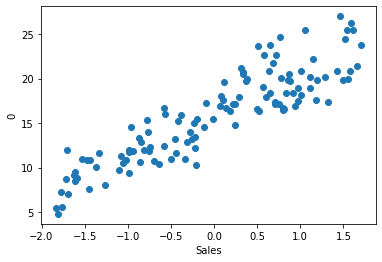

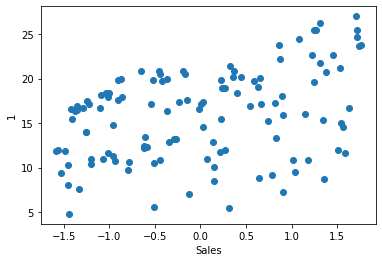

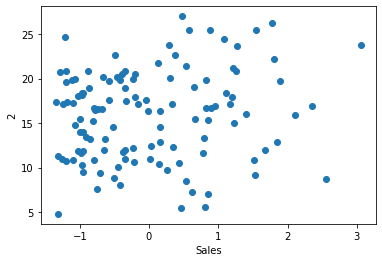

In [66]:
num_columns=x_train.shape[1]
for column in range(num_columns):
    plt.figure()
    plt.scatter(x_train_scaler[:,column],y_train.values)
    plt.ylabel(column)
    plt.xlabel("Sales")
    plt.show()

In [67]:
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(x_train_scaler,y_train)
y_hat=model.predict(x_train_scaler)
mse_tr=mean_squared_error(y_train,y_hat) # this function divides by m and not 2*m
print(f" mse for train set :{mse_tr/2}") # we must divide per 2

 mse for train set :1.0802725364135384


In [68]:
# normalizing the cross validation set

In [69]:
x_cv_scaler=standard_scaler.transform(x_cv)

In [70]:
model.fit(x_cv_scaler,y_cv)
y_hat=model.predict(x_cv_scaler)
mse_cv=mean_squared_error(y_cv,y_hat) # this function divides by m and not 2*m
print(f" mse for cross validation set :{mse_cv/2}")

 mse for cross validation set :1.5422437005796326


In [71]:
# We are using a polynomial model to improve our model.

In [72]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_train_mapped=poly.fit_transform(x_train)
standard_scaler=StandardScaler()
x_train_mapped_scaler=standard_scaler.fit_transform(x_train_mapped)
model=LinearRegression()
model.fit(x_train_mapped_scaler,y_train)
y_hat=model.predict(x_train_mapped_scaler)
print(f" mse for polynomial model for train set {mean_squared_error(y_train,y_hat)/2}")

 mse for polynomial model for train set 0.7649064832073996


In [73]:
x_cv_mapped=poly.transform(x_cv)
x_cv_mapped_scaler=standard_scaler.transform(x_cv_mapped)
y_hat=model.predict(x_cv_mapped_scaler)
print(f" mse dor polynomial features for cv set {mean_squared_error(y_cv,y_hat)/2}")

 mse dor polynomial features for cv set 1.0951934218596175


### model selection

Text(0, 0.5, ' MSE ')

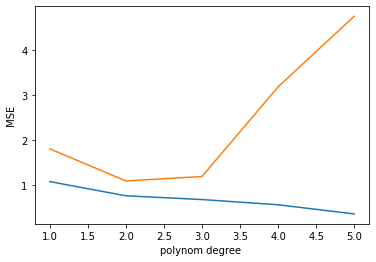

In [54]:
train_mse=[]
cv_mse=[]
polys=[]
models=[]
scaler=[]

for degree in range(1,6):
    poly=PolynomialFeatures(degree=degree,include_bias=False)
    x_train_mapped=poly.fit_transform(x_train)
    polys.append(poly)
    
    standard_scaler=StandardScaler()
    x_train_mapped_scaler=standard_scaler.fit_transform(x_train_mapped)
    scaler.append(standard_scaler)
    
    model=LinearRegression()
    model.fit(x_train_mapped_scaler,y_train)
    models.append(model)
    
    y_hat=model.predict(x_train_mapped_scaler)
    mse_train=(mean_squared_error(y_train,y_hat)/2)
    train_mse.append(mse_train)
    
    x_cv_mapped=poly.transform(x_cv)
    x_cv_mapped_scaler=standard_scaler.transform(x_cv_mapped)
    y_hat=model.predict(x_cv_mapped_scaler)
    mse_cv=(mean_squared_error(y_cv,y_hat)/2)
    cv_mse.append(mse_cv)
degree=range(1,6)
plt.plot(degree,train_mse)
plt.plot(degree,cv_mse)
plt.xlabel("polynom degree ")
plt.ylabel(" MSE ")

In [55]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=2


## test set

In [56]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 0.76
Cross Validation MSE: 1.10
Test MSE: 1.47
